In [3]:
import os 
import numpy as np
os.getcwd()

'/Users/nikhilgaruda/Documents/Astronomy_Research/ASTR_302_Final_Project/src/SED'

In [4]:
import eazy

In [5]:
params = {}
params['CATALOG_FILE'] = '../../catalogs/master_catalog_f444w_astropy.cat'
params['CATALOG_FORMAT'] = 'ascii.fixed_width_two_line'
params['MAIN_OUTPUT_FILE'] = '../../catalogs/g165_444w_astropy.eazypy'

params['Z_STEP'] = 0.01
params['Z_MIN'] = 0.01
params['Z_MAX'] = 7

params['MAGNITUDES'] = 'n' ### TURN THIS to 'n' if your catalog is in Fn

params['APPLY_PRIOR'] = 'n'

# params['TEMPLATES_FILE'] = 'templates/Larson/newtemplates_LyaR.param'
params['TEMPLATES_FILE'] = 'templates/fsps_full/tweak_fsps_QSF_12_v3.param'
params['TEMPLATE_COMBOS'] = 'a'
params['FIX_ZSPEC'] = False

SAVE_FITS = True

In [8]:
translate_file = 'g165_nikhil.translate'

In [9]:
### After all of that, you should now be able to run the PhotoZ object that does the eazypy photometric redshift!!

ez = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=None, 
                          params=params, load_prior=False, load_products=False, n_proc=8, random_seed=64)

Read default param file: /opt/homebrew/Caskroom/miniforge/base/envs/astroJWST/lib/python3.10/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: ../../catalogs/master_catalog_f444w_astropy.cat
   >>> NOBJ = 1954
F200W F200W_ERROR (366): jwst_nircam_f200w
F090W F090W_ERROR (363): jwst_nircam_f090w
F150W F150W_ERROR (365): jwst_nircam_f150w
F277W F277W_ERROR (375): jwst_nircam_f277w
F356W F356W_ERROR (376): jwst_nircam_f356w
F444W F444W_ERROR (377): jwst_nircam_f444w
Set sys_err = 0.01 (positive=True)
Template grid: templates/fsps_full/tweak_fsps_QSF_12_v3.param (this may take some time)


/opt/homebrew/Caskroom/miniforge/base/envs/astroJWST/lib/python3.10/site-packages/eazy/photoz.py:975: RuntimeWarning: overflow encountered in square
  efnu = np.sqrt(self.efnu_orig**2 +
/opt/homebrew/Caskroom/miniforge/base/envs/astroJWST/lib/python3.10/site-packages/eazy/photoz.py:976: RuntimeWarning: overflow encountered in square
  (self.param['SYS_ERR']*np.maximum(self.fnu, 0.))**2)
100%|██████████| 12/12 [00:03<00:00,  3.77it/s]


Template   0: tweak_fsps_QSF_12_v3_001.dat (NZ=1).
Template   1: tweak_fsps_QSF_12_v3_002.dat (NZ=1).
Template   2: tweak_fsps_QSF_12_v3_003.dat (NZ=1).
Template   3: tweak_fsps_QSF_12_v3_004.dat (NZ=1).
Template   4: tweak_fsps_QSF_12_v3_005.dat (NZ=1).
Template   5: tweak_fsps_QSF_12_v3_006.dat (NZ=1).
Template   6: tweak_fsps_QSF_12_v3_007.dat (NZ=1).
Template   7: tweak_fsps_QSF_12_v3_008.dat (NZ=1).
Template   8: tweak_fsps_QSF_12_v3_009.dat (NZ=1).
Template   9: tweak_fsps_QSF_12_v3_010.dat (NZ=1).
Template  10: tweak_fsps_QSF_12_v3_011.dat (NZ=1).
Template  11: tweak_fsps_QSF_12_v3_012.dat (NZ=1).
Process templates: 3.632 s


207it [00:00, 4412.43it/s]


In [10]:
# Full catalog
sample = np.isfinite(ez.ZSPEC)

ez.fit_catalog(ez.idx[sample], n_proc=8, fitter='nnls')

100%|██████████| 207/207 [00:03<00:00, 54.25it/s]


Compute best fits
fit_best: 0.2 s (n_proc=1,  NOBJ=1473)
Fit 4.2 s (n_proc=8, NOBJ=1954)


In [12]:
import warnings


if SAVE_FITS:
    warnings.simplefilter('ignore', category=RuntimeWarning)
    zout, hdu = ez.standard_output(simple=False,
                                   prior=True,
                                   beta_prior=True,
                                   absmag_filters=[],
                                   extra_rf_filters=[],
                                   save_fits=2,
                                )

Get best fit coeffs & best redshifts
fit_best: 0.3 s (n_proc=1,  NOBJ=1473)
Get parameters (UBVJ=[153, 154, 155, 161], simple=False)


100%|██████████| 1473/1473 [00:02<00:00, 666.60it/s]


Text(0.5, 0, '$z_{best}$')

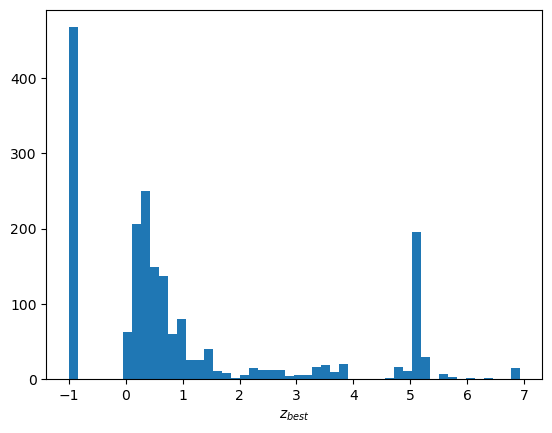

In [11]:
import matplotlib.pyplot as plt
plt.hist(ez.zbest, bins=50)
plt.xlabel(r'$z_{best}$')

In [24]:
ez.OBJID[4141]

4142

In [ ]:
from matplotlib import pyplot as plt

# ids = np.where((ez.zbest > 2.3) & (ez.zbest < 2.7))
for id in [4141, 4186, 4328, 4360, 4303]:
# for id in [15513, 15304, 14193, 12558, 15604, 7771]: # pypher 444 catalog ids
# for id in ez.cat['id']:
    ez.show_fit(id=id, show_fnu=1, logpz=True, zr=[0, 6], show_components=False, show=True, vertical=False)
    plt.show()